# Problem Statement : 

To Predict the Average Medicare Standardized Payment Amount  for the medicare service.

# About Medicare :

1) Medicare is the federal government plan in the U.S. for paying certain hospital and medical expenses for elderly persons qualifying under the plan.

2) It is available for people age 65 or older, younger people with disabilities and people with End Stage Renal Disease (permanent kidney failure requiring dialysis or transplant). Medicare has two parts, Part A (Hospital Insurance) and Part B (Medicare Insurance). You are eligible for premium-free Part A if you are age 65 or older and you or your spouse worked and paid Medicare taxes for at least 10 years.

3) Medicare Part A (Hospital Insurance): Part A covers inpatient hospital stays, care in a skilled nursing facility, hospice care, and some home health care.

4) Medicare Part B (Medical Insurance): Part B covers certain doctors' services, outpatient care, medical supplies, and preventive services.

5) Medicare Part D (prescription drug coverage): Helps cover the cost of prescription drugs (including many recommended shots or vaccines).

# Note :
 
The following image gives detailed information about HCPCS codes for better interpretation.

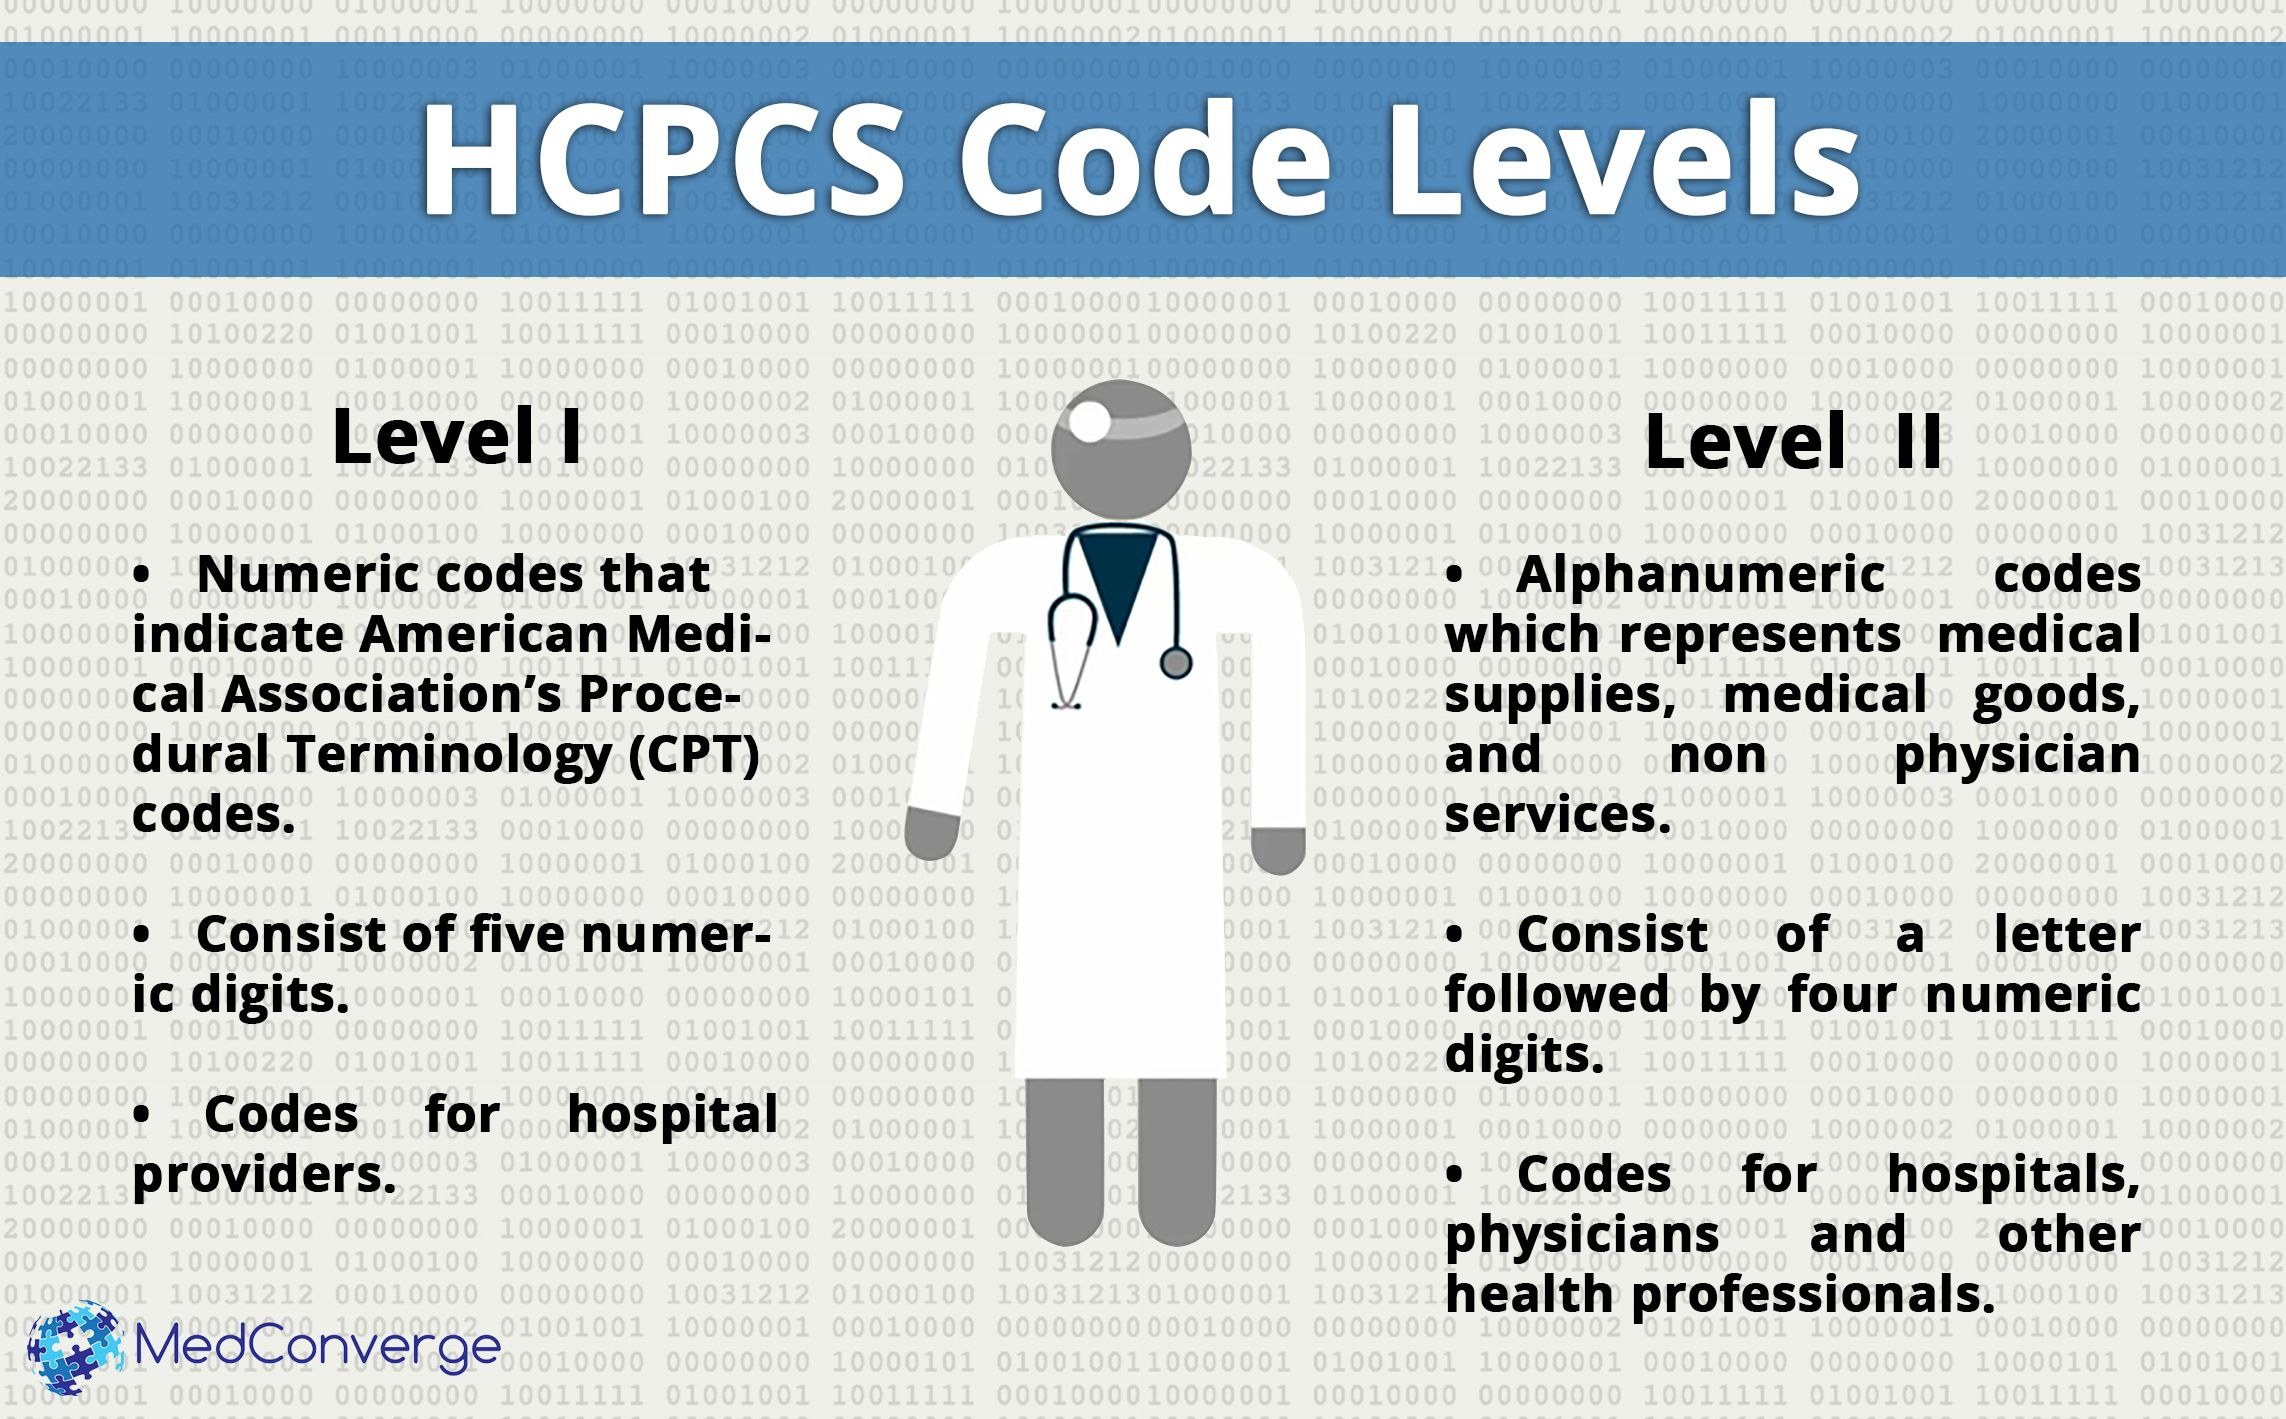

# Medicare Physician & Other Practitioners - by Geography and Service Data Dictionary :

# 1) Rndrng_Prvdr_Geo_Lvl :

Variable Name :  Geography Level

Identifies the level of geography that the data in therow has been aggregated. A value of 'State' indicates the data in the row is aggregated to a single state identified in the Rendering Provider State column for a given HCPCS Code Level. A value of 'National' indicates the data in the row is aggregated across all states for a given HCPCS Code Level. 

# 2) Rndrng_Prvdr_Geo_Cd  :

Variable Name : Rendering Provider Geography Code  

FIPS code of the referring provider state. This variable is blank when reported at the national level.

# 3) Rndrng_Prvdr_Geo_Desc : 

Variable Name : Rendering Provider Geography Description 

The state name where the provider is located, as reported in NPPES. The values include the 50 United States, District of Columbia, U.S. territories, Armed Forces areas, Unknown and Foreign Country. Data
aggregated at the National level are identified by the word 'National'. 

# 4) HCPCS_Cd :

Variable Name : HCPCS Code

HCPCS code used to identify the specific medicalservice furnished by the provider. HCPCS codes include
two levels. Level I codes are the Current Procedural Terminology (CPT) codes that are maintained by the American Medical Association and Level II codes are created by CMS to identify products, supplies and services not covered by the CPT codes (such as ambulance services). CPT codes, descriptions and other data only are copyright 2016 American Medical Association. All rights reserved. CPT is a registered trademark of the American Medical Association (AMA).Please review the complete CMS AMA CPT License agreement which is presented to users when accessing the data. For additional information on HCPCS codes,visit the HCPCS general information page. 

# 5) HCPCS_Desc : 

Variable Name : HCPCS Description

Description of the HCPCS code for the specific medical service furnished by the provider. HCPCS descriptions associated with CPT codes are consumer friendly descriptions provided by the AMA. CPT Consumer Friendly Descriptors are lay synonyms for CPT descriptors that are intended to help healthcare consumers who are not medical professionals understand clinical procedures on bills and patient portals. CPT Consumer Friendly Descriptors should not be used for clinical coding or documentation. All other descriptions are CMS Level II descriptions provided in long form. Due to variable length restrictions, the CMS Level II descriptions have been truncated to 256 bytes.As a result, the same HCPCS description can be associated with more than one HCPCS code. For complete CMS Level II descriptions, please visit the HCPCS Release Code Sets page. 

# 6) HCPCS_Drug_Ind :

Variable Name : HCPCS Drug Indicator 

Identifies whether the HCPCS code for the specific service furnished by the provider is a HCPCS listed on the Medicare Part B Drug Average Sales Price (ASP) File.Please visit the ASP drug pricing page for additional information. 

# 7) Place_Of_Srvc :

Variable Name : Place of Service

Identifies whether the place of service submitted onthe claims is a facility (value of ‘F’) or non-facility (value of ‘O’). Non-facility is generally an office setting; however other entities are included in non-facility. The following values are entities included in facility and nonfacility: 

# 8) Tot_Rndrng_Prvdrs :

Variable Name : Number of Providers

Number of providers within HCPCS code and place of service.

# 9) Tot_Srvcs :

Variable Name : Number of Services 

Number of services provided; note that the metrics used to count the number provided can vary from
service to service. 

# 10) Tot_Benes :

Variable Name : Number of Medicare Beneficiaries

Number of distinct Medicare beneficiaries receiving the service for each Rndrng_Prvdr_Geo_Desc and
HCPCS_Cd, Place_Of_Srvc.

# 11) Tot_Bene_Day_Srvcs :

Variable Name : Number of Distinct Medicare Beneficiary/Per Day Services 

Number of distinct Medicare beneficiary/per day services. Since a given beneficiary may receive multiple services of the same type (e.g., single vs. multiple cardiac stents) on a single day, this metric removes double-counting from the line service count to identify whether a unique service occurred. 

# 12) Avg_Sbmtd_Chrg :

Variable Name : Average Submitted Charge Amount

Average of the charges that providers submit for the service.

# 13) Avg_Mdcr_Alowd_Amt :

Variable Name : Average Medicare Allowed Amount

Average of the Medicare allowed amount for the service. Medicare allowed amounts includes the
amount Medicare pays, the deductible and coinsurance amounts that the beneficiary is responsible for paying, and any amounts that a third party is responsible for paying. 

# 14) Avg_Mdcr_Pymt_Amt :

Variable Name : Average Medicare Payment Amount 

Average amount that Medicare paid after deductible and coinsurance amounts have been deducted for the
line item service. 

# 15) Avg_Mdcr_Stdzd_Amt :

Variable Name : Average Medicare Standardized Payment Amount 

Average amount that Medicare paid after beneficiary deductible and coinsurance amounts have been
deducted for the line item service and after standardization of the Medicare payment has been
applied. Standardization removes geographic differences in payment rates for individual services,
such as those that account for local wages or input prices and makes Medicare payments across
geographic areas comparable, so that differences reflect variation in factors such as physicians’ practice patterns and beneficiaries’ ability and willingness to obtain care. Additional information on the standardization of Medicare payments can be found in the “Geographic Variation Public Use File: Technical Supplement on Standardization.”


# Methodology :

Here, we are going to predict "Average Medicare Standardized Payment Amount" by using regression algorithms. For this we are gonna load and analyse the data for any latent patterns, and we also gonna check for missing values and encode categorical values. And thus apply all the Data preprocessing steps, and I'll explain the remaining procedure one by one in the below process. And here we go,.....

# 1. Initiating pyspark framework and loading data into pyspark's dataframe

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing pyspark related modules
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import isnan, when, count, col
from pyspark.sql.functions import skewness,kurtosis

In [3]:
#Importing other modules not related to pyspark
import statistics as stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
spark=SparkSession.builder.appName('Medicare').getOrCreate()

In [5]:
spark

In [6]:
# Load the dataset as dataframe
medicaredf=spark.read.csv('D:/Projects/Medicare/Medicare_Data.csv',inferSchema=True,header=True)

In [7]:
medicaredf.show(5)

+--------------------+-------------------+---------------------+--------+--------------------+--------------+-------------+-----------------+---------+---------+------------------+--------------+------------------+-----------------+------------------+
|Rndrng_Prvdr_Geo_Lvl|Rndrng_Prvdr_Geo_Cd|Rndrng_Prvdr_Geo_Desc|HCPCS_Cd|          HCPCS_Desc|HCPCS_Drug_Ind|Place_Of_Srvc|Tot_Rndrng_Prvdrs|Tot_Benes|Tot_Srvcs|Tot_Bene_Day_Srvcs|Avg_Sbmtd_Chrg|Avg_Mdcr_Alowd_Amt|Avg_Mdcr_Pymt_Amt|Avg_Mdcr_Stdzd_Amt|
+--------------------+-------------------+---------------------+--------+--------------------+--------------+-------------+-----------------+---------+---------+------------------+--------------+------------------+-----------------+------------------+
|            National|               null|             National|   0003M|Liver disease, te...|             N|            O|               12|       41|     42.0|                42|  680.54714286|      438.21166667|     438.21166667|      447.51

In [8]:
# view the schema
medicaredf.printSchema()

root
 |-- Rndrng_Prvdr_Geo_Lvl: string (nullable = true)
 |-- Rndrng_Prvdr_Geo_Cd: string (nullable = true)
 |-- Rndrng_Prvdr_Geo_Desc: string (nullable = true)
 |-- HCPCS_Cd: string (nullable = true)
 |-- HCPCS_Desc: string (nullable = true)
 |-- HCPCS_Drug_Ind: string (nullable = true)
 |-- Place_Of_Srvc: string (nullable = true)
 |-- Tot_Rndrng_Prvdrs: integer (nullable = true)
 |-- Tot_Benes: integer (nullable = true)
 |-- Tot_Srvcs: double (nullable = true)
 |-- Tot_Bene_Day_Srvcs: integer (nullable = true)
 |-- Avg_Sbmtd_Chrg: double (nullable = true)
 |-- Avg_Mdcr_Alowd_Amt: double (nullable = true)
 |-- Avg_Mdcr_Pymt_Amt: double (nullable = true)
 |-- Avg_Mdcr_Stdzd_Amt: double (nullable = true)



In [9]:
# view the variable names
medicaredf.columns

['Rndrng_Prvdr_Geo_Lvl',
 'Rndrng_Prvdr_Geo_Cd',
 'Rndrng_Prvdr_Geo_Desc',
 'HCPCS_Cd',
 'HCPCS_Desc',
 'HCPCS_Drug_Ind',
 'Place_Of_Srvc',
 'Tot_Rndrng_Prvdrs',
 'Tot_Benes',
 'Tot_Srvcs',
 'Tot_Bene_Day_Srvcs',
 'Avg_Sbmtd_Chrg',
 'Avg_Mdcr_Alowd_Amt',
 'Avg_Mdcr_Pymt_Amt',
 'Avg_Mdcr_Stdzd_Amt']

In [10]:
# overview of columns
print('Columns overview')
pd.DataFrame(medicaredf.dtypes, columns = ['Column Name','Data type'])

Columns overview


,Column Name,Data type
0,Rndrng_Prvdr_Geo_Lvl,string
1,Rndrng_Prvdr_Geo_Cd,string
2,Rndrng_Prvdr_Geo_Desc,string
3,HCPCS_Cd,string
4,HCPCS_Desc,string
5,HCPCS_Drug_Ind,string
6,Place_Of_Srvc,string
7,Tot_Rndrng_Prvdrs,int
8,Tot_Benes,int
9,Tot_Srvcs,double


In [11]:
# check for shape of the dataset(observations & variables)
medicaredf.toPandas().shape

(273211, 15)

so, there are 2,73,211 observations and 15 variables

In [12]:
# Here, Data frame described only for numerical columns
medicaredf.select(['Tot_Rndrng_Prvdrs',
 'Tot_Benes',
 'Tot_Srvcs',
 'Tot_Bene_Day_Srvcs',
 'Avg_Sbmtd_Chrg',
 'Avg_Mdcr_Alowd_Amt',
 'Avg_Mdcr_Pymt_Amt',
 'Avg_Mdcr_Stdzd_Amt']).describe().toPandas()

,summary,Tot_Rndrng_Prvdrs,Tot_Benes,Tot_Srvcs,Tot_Bene_Day_Srvcs,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt
0,count,273211,273211,273211,273211,273211,273211,273211,273211
1,mean,267.3824333573685,5582.857311748063,23725.812362240187,10960.983236399707,1251.1729560482065,295.7277131232784,235.19698997721204,234.76901391762877
2,stddev,3149.8699902967414,118002.57883787558,656658.9647366097,341582.3184353983,2316.3861361764116,756.8430357258275,604.1443018879107,607.6116391814397
3,min,1,11,11.0,11,0.01,0.01,0.0045454545,0.0094117647
4,max,564937,23594693,1.345132372E8,97997891,93181.056818,62142.821685,49501.502697,49501.503146


# 2.Detect missing values and abnormal zeroes 

"After having a first sight of the columns, the first thing we should check is if the data set having any missing value".

For string columns, we check for None and null.
For numeric columns, we check for zeroes and NaN.
For array type columns, we check if the array contain zeroes or NaN.

In [13]:
medicaredf.toPandas().isnull().sum().sort_values(ascending=False)

Rndrng_Prvdr_Geo_Cd      12994
Rndrng_Prvdr_Geo_Lvl         0
Rndrng_Prvdr_Geo_Desc        0
HCPCS_Cd                     0
HCPCS_Desc                   0
HCPCS_Drug_Ind               0
Place_Of_Srvc                0
Tot_Rndrng_Prvdrs            0
Tot_Benes                    0
Tot_Srvcs                    0
Tot_Bene_Day_Srvcs           0
Avg_Sbmtd_Chrg               0
Avg_Mdcr_Alowd_Amt           0
Avg_Mdcr_Pymt_Amt            0
Avg_Mdcr_Stdzd_Amt           0
dtype: int64

In [14]:
# Just to be sure,we are gonna check again......
# Checking for NaN values in medicaredf (dataframe)
medicaredf.select([count(when(isnan(c), c)).alias(c) for c in medicaredf.columns]).show()

+--------------------+-------------------+---------------------+--------+----------+--------------+-------------+-----------------+---------+---------+------------------+--------------+------------------+-----------------+------------------+
|Rndrng_Prvdr_Geo_Lvl|Rndrng_Prvdr_Geo_Cd|Rndrng_Prvdr_Geo_Desc|HCPCS_Cd|HCPCS_Desc|HCPCS_Drug_Ind|Place_Of_Srvc|Tot_Rndrng_Prvdrs|Tot_Benes|Tot_Srvcs|Tot_Bene_Day_Srvcs|Avg_Sbmtd_Chrg|Avg_Mdcr_Alowd_Amt|Avg_Mdcr_Pymt_Amt|Avg_Mdcr_Stdzd_Amt|
+--------------------+-------------------+---------------------+--------+----------+--------------+-------------+-----------------+---------+---------+------------------+--------------+------------------+-----------------+------------------+
|                   0|                  0|                    0|       0|         0|             0|            0|                0|        0|        0|                 0|             0|                 0|                0|                 0|
+--------------------+----------

In [15]:
# Checking for Null values in medicaredf (dataframe)
medicaredf.select([count(when(col(c).isNull(), c)).alias(c) for c in medicaredf.columns]).show()

+--------------------+-------------------+---------------------+--------+----------+--------------+-------------+-----------------+---------+---------+------------------+--------------+------------------+-----------------+------------------+
|Rndrng_Prvdr_Geo_Lvl|Rndrng_Prvdr_Geo_Cd|Rndrng_Prvdr_Geo_Desc|HCPCS_Cd|HCPCS_Desc|HCPCS_Drug_Ind|Place_Of_Srvc|Tot_Rndrng_Prvdrs|Tot_Benes|Tot_Srvcs|Tot_Bene_Day_Srvcs|Avg_Sbmtd_Chrg|Avg_Mdcr_Alowd_Amt|Avg_Mdcr_Pymt_Amt|Avg_Mdcr_Stdzd_Amt|
+--------------------+-------------------+---------------------+--------+----------+--------------+-------------+-----------------+---------+---------+------------------+--------------+------------------+-----------------+------------------+
|                   0|              12994|                    0|       0|         0|             0|            0|                0|        0|        0|                 0|             0|                 0|                0|                 0|
+--------------------+----------

Therefore, we came to know that there are 12994 null or missing values in "Rndrng_Prvdr_Geo_Cd" variable.

In [16]:
# As we already know that 'Rndrng_Prvdr_Geo_Cd' has 12994 null values.And "Rendering Provider Geography Code" is just a  geograhical code and therefore we replace it with a random number '99'
medicaredf=medicaredf.na.fill(value="99",subset="Rndrng_Prvdr_Geo_Cd")

In [17]:
medicaredf.show(5)

+--------------------+-------------------+---------------------+--------+--------------------+--------------+-------------+-----------------+---------+---------+------------------+--------------+------------------+-----------------+------------------+
|Rndrng_Prvdr_Geo_Lvl|Rndrng_Prvdr_Geo_Cd|Rndrng_Prvdr_Geo_Desc|HCPCS_Cd|          HCPCS_Desc|HCPCS_Drug_Ind|Place_Of_Srvc|Tot_Rndrng_Prvdrs|Tot_Benes|Tot_Srvcs|Tot_Bene_Day_Srvcs|Avg_Sbmtd_Chrg|Avg_Mdcr_Alowd_Amt|Avg_Mdcr_Pymt_Amt|Avg_Mdcr_Stdzd_Amt|
+--------------------+-------------------+---------------------+--------+--------------------+--------------+-------------+-----------------+---------+---------+------------------+--------------+------------------+-----------------+------------------+
|            National|                 99|             National|   0003M|Liver disease, te...|             N|            O|               12|       41|     42.0|                42|  680.54714286|      438.21166667|     438.21166667|      447.51

As, there are no missing values in the dataframe. we can go ahead to "Data Analysis".

# 3. Exploratory Data Analysis

For Dependent variable

# Avg_Mdcr_Stdzd_Amt (Target / Predictor / Dependent)

<AxesSubplot:ylabel='Density'>

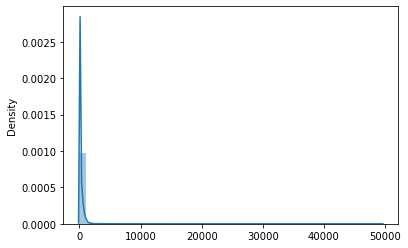

In [18]:
# Distribution of dependent variable
# sample the dataframe(Avg_Mdcr_Stdzd_Amt)
sample_Avg_Mdcr_Stdzd_Amt = medicaredf.select(["Avg_Mdcr_Stdzd_Amt"])
# converting the sample pyspark dataframe into pandas dataframe
pandas_Avg_Mdcr_Stdzd_Amt = sample_Avg_Mdcr_Stdzd_Amt.toPandas()
# Plotting the converted dependent variable (Avg_Mdcr_Stdzd_Amt)
sns.distplot(pandas_Avg_Mdcr_Stdzd_Amt)

In [19]:
medicaredf.select('Avg_Mdcr_Stdzd_Amt').describe().show()

+-------+------------------+
|summary|Avg_Mdcr_Stdzd_Amt|
+-------+------------------+
|  count|            273211|
|   mean|234.76901391762877|
| stddev| 607.6116391814397|
|    min|      0.0094117647|
|    max|      49501.503146|
+-------+------------------+



From the above distribution of "Avg_Mdcr_Stdzd_Amt", we came to know that it is positively skewed.

In [20]:
# skewness and kurtosis of dependent variable
from pyspark.sql.functions import skewness,kurtosis
medicaredf.select(skewness('Avg_Mdcr_Stdzd_Amt'),
                  kurtosis('Avg_Mdcr_Stdzd_Amt')).show()

+----------------------------+----------------------------+
|skewness(Avg_Mdcr_Stdzd_Amt)|kurtosis(Avg_Mdcr_Stdzd_Amt)|
+----------------------------+----------------------------+
|          30.004865574427477|           1589.235427541575|
+----------------------------+----------------------------+



In [21]:
# To know more about the distribution of dependent variable, we can view the quartiles of "Avg_Mdcr_Stdzd_Amt"
quartiles=medicaredf.approxQuantile('Avg_Mdcr_Stdzd_Amt',
                                    [0.25,0.50,0.75],0)
quartiles

[29.232, 91.376957566, 267.50869565]

In [22]:
# The Average Avg_Mdcr_Stdzd_Amt of Rndrng_Prvdr_Geo_Lvl
medicaredf.groupBy('Rndrng_Prvdr_Geo_Lvl').mean('Avg_Mdcr_Stdzd_Amt').show()

+--------------------+-----------------------+
|Rndrng_Prvdr_Geo_Lvl|avg(Avg_Mdcr_Stdzd_Amt)|
+--------------------+-----------------------+
|            National|      314.8065130034307|
|               State|      230.7723216833747|
+--------------------+-----------------------+



Avg_Mdcr_Stdzd_Amt by Rndrng_Prvdr_Geo_Lvl :
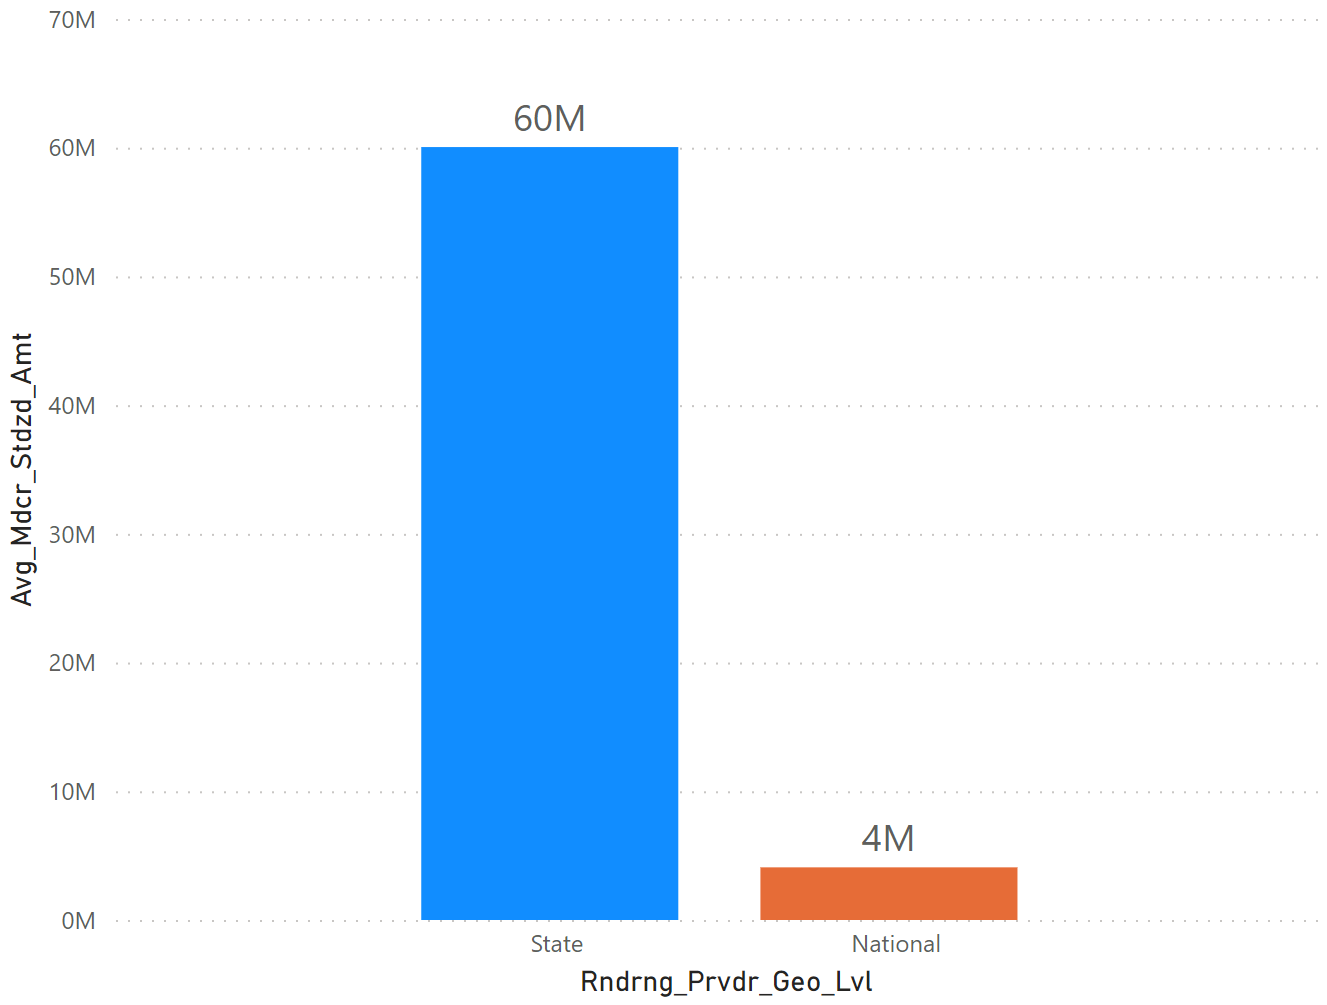

In [23]:
# The Average Avg_Mdcr_Stdzd_Amt of different Place_of_Service
medicaredf.groupBy('Place_Of_Srvc').mean('Avg_Mdcr_Stdzd_Amt').show()

+-------------+-----------------------+
|Place_Of_Srvc|avg(Avg_Mdcr_Stdzd_Amt)|
+-------------+-----------------------+
|            F|      290.1336623658629|
|            O|     168.03567738619722|
+-------------+-----------------------+



Avg_Mdcr_Stdzd_Amt by Place_Of_Srvc :
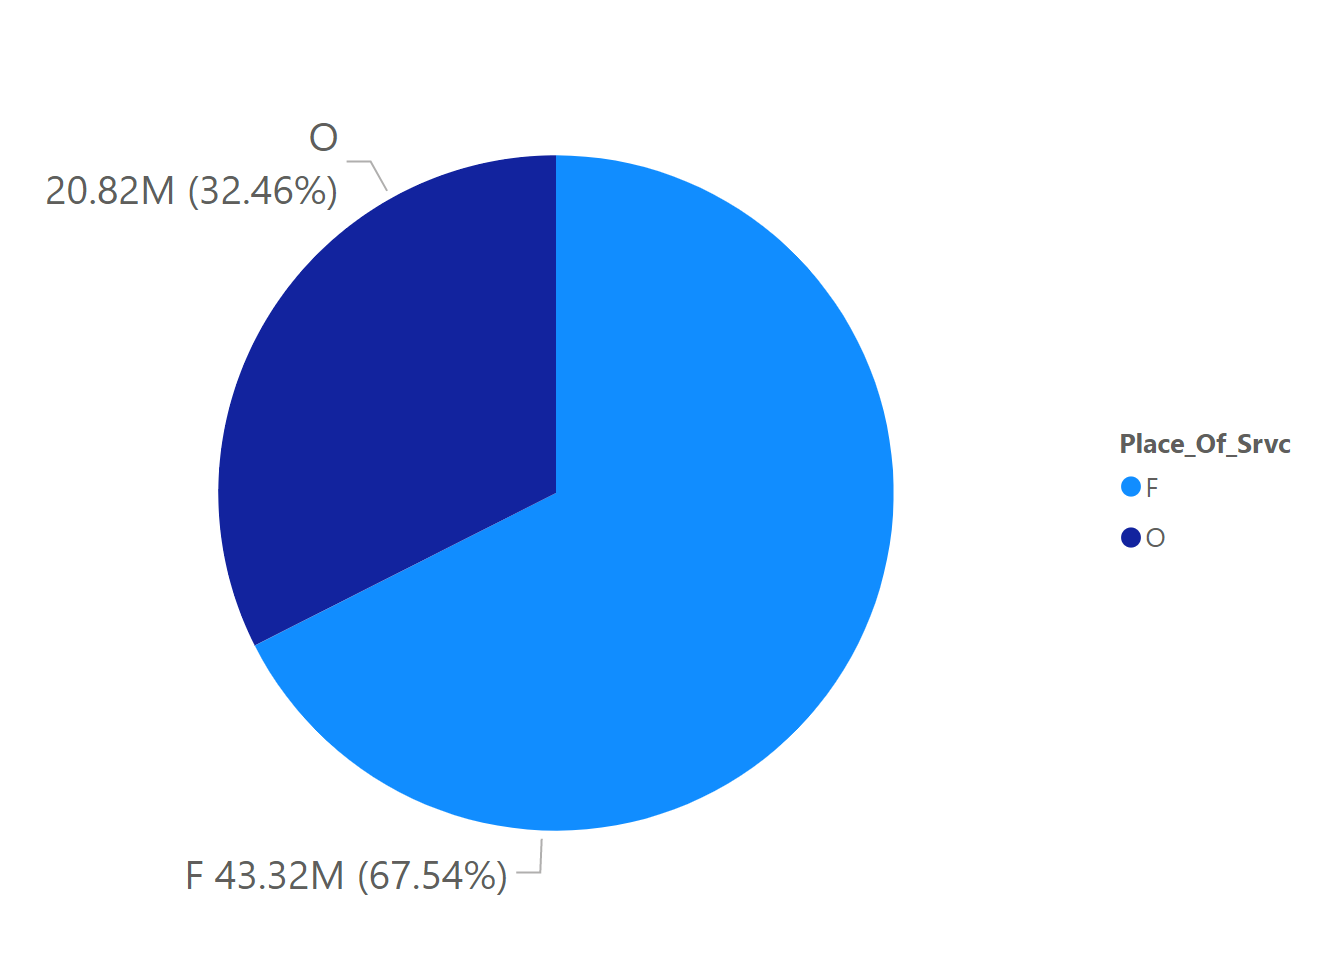

In [24]:
medicaredf.groupBy('Place_Of_Srvc').mean(
    'Avg_Sbmtd_Chrg','Avg_Mdcr_Alowd_Amt','Avg_Mdcr_Pymt_Amt',
    'Avg_Mdcr_Stdzd_Amt').show()

+-------------+-------------------+-----------------------+----------------------+-----------------------+
|Place_Of_Srvc|avg(Avg_Sbmtd_Chrg)|avg(Avg_Mdcr_Alowd_Amt)|avg(Avg_Mdcr_Pymt_Amt)|avg(Avg_Mdcr_Stdzd_Amt)|
+-------------+-------------------+-----------------------+----------------------+-----------------------+
|            F| 1762.5514697389008|     367.52786325837485|    291.94821915627347|      290.1336623658629|
|            O|  634.7869515209593|     209.18397598653004|    166.79234944346675|     168.03567738619722|
+-------------+-------------------+-----------------------+----------------------+-----------------------+



As, we already know that 'Avg_Mdcr_Stdzd_Amt' is the dependent variable and our job is to predict it with the help of other independent variables. Therefore in regression analysis, multicollinearity plays a major role in the prediction of predictor variable and it is better to check for correlation of dependent variable with other independent variables before applying regression algorithms.From the dataframe, it is evident that 'Avg_Mdcr_Stdzd_Amt' has a high chance of correlation with Avg_Sbmtd_Chrg, Avg_Mdcr_Alowd_Amt, Avg_Mdcr_Pymt_Amt.Therefore we map correlation among these.we might also be checking for multicollinearity among independent variables also.

In [25]:
corr_data = medicaredf.select('Avg_Sbmtd_Chrg','Avg_Mdcr_Alowd_Amt','Avg_Mdcr_Pymt_Amt',
    'Avg_Mdcr_Stdzd_Amt')

In [26]:
corr_data.toPandas().corr()

,Avg_Sbmtd_Chrg,Avg_Mdcr_Alowd_Amt,Avg_Mdcr_Pymt_Amt,Avg_Mdcr_Stdzd_Amt
Avg_Sbmtd_Chrg,1.000000,0.795819,0.795314,0.786145
Avg_Mdcr_Alowd_Amt,0.795819,1.000000,0.999763,0.996651
Avg_Mdcr_Pymt_Amt,0.795314,0.999763,1.000000,0.996853
Avg_Mdcr_Stdzd_Amt,0.786145,0.996651,0.996853,1.000000


Relationship of Avg_Mdcr_Stdzd_Amt with Avg_Mdcr_Pymt_Amt and Avg_Mdcr_Alowd_Amt :
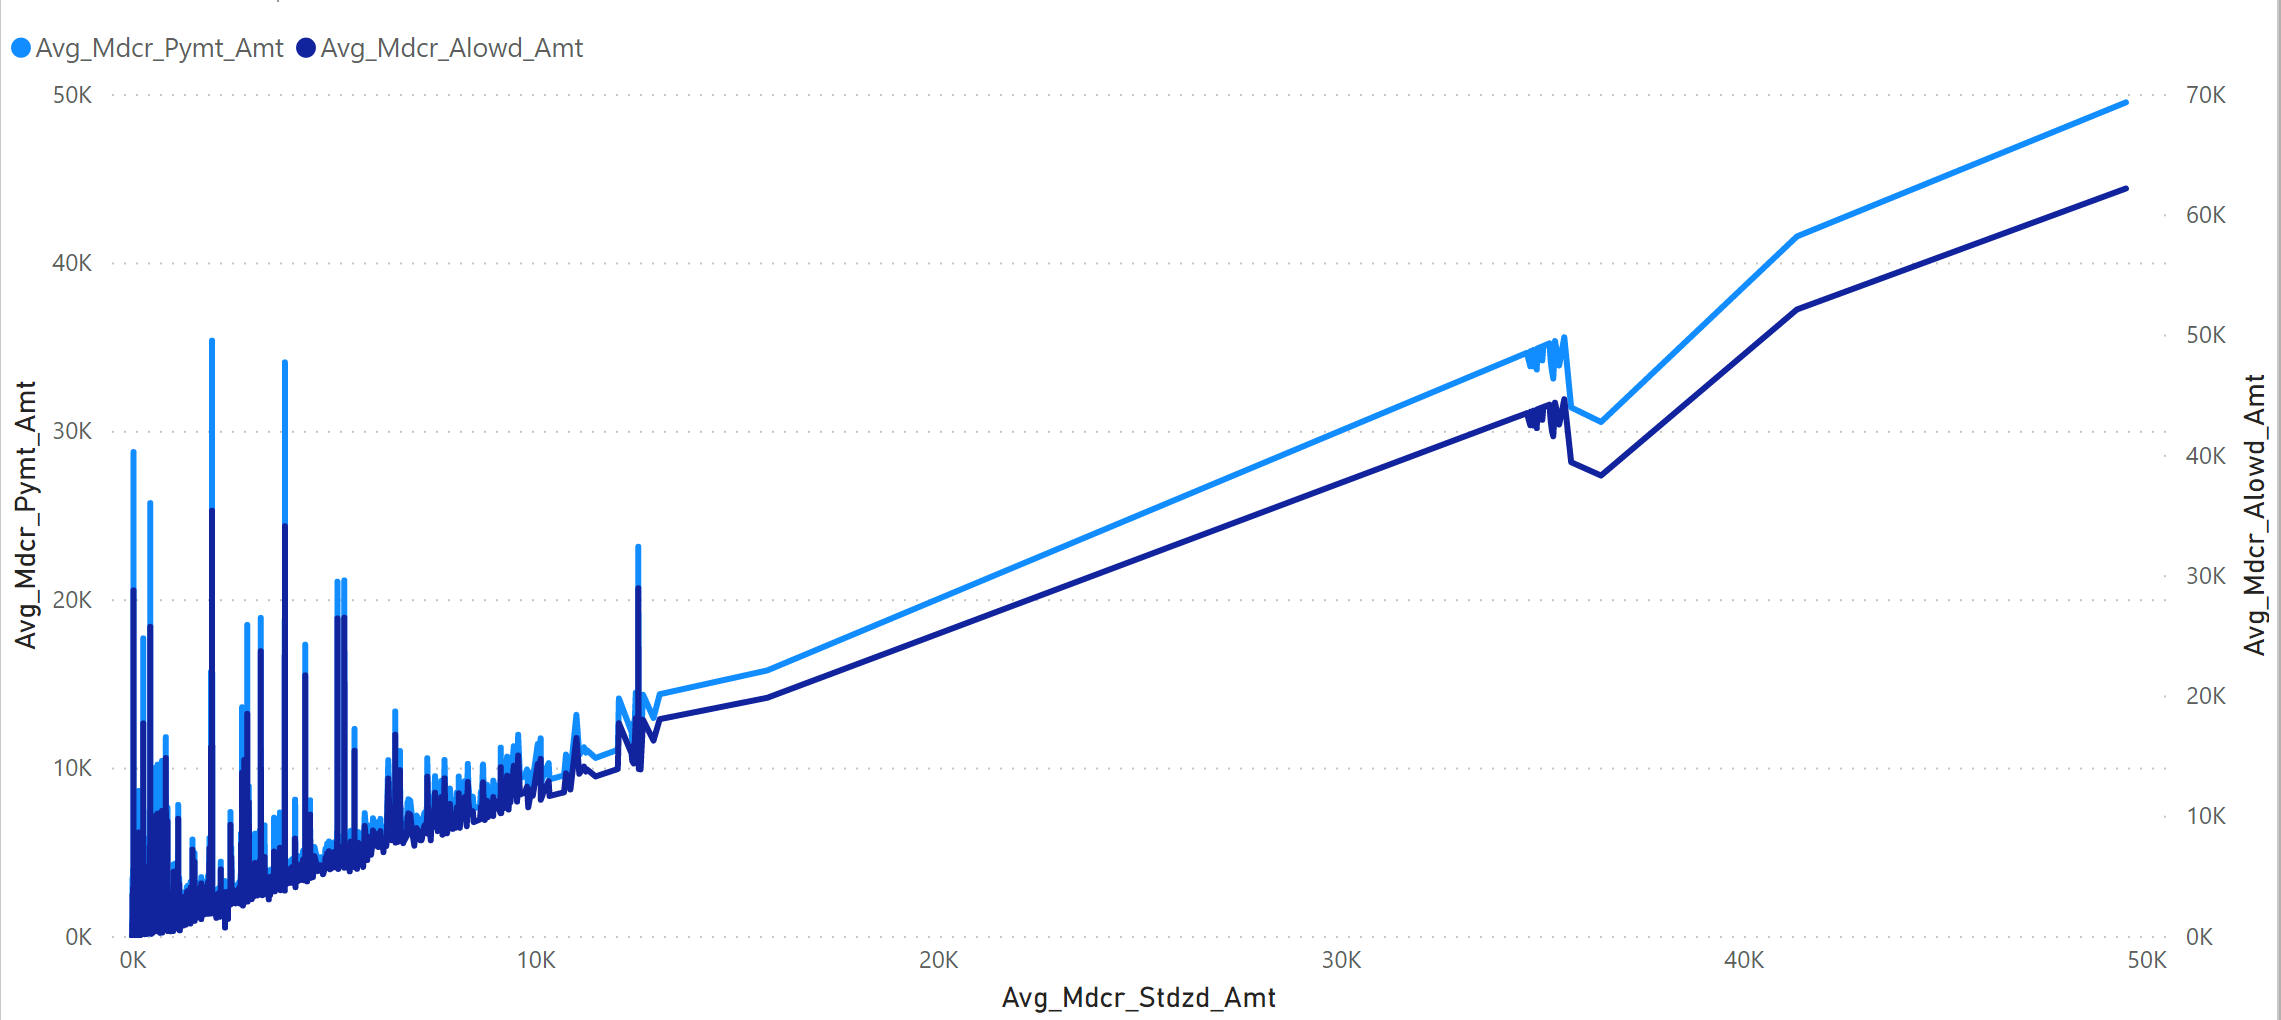

Therefore it is clearly visible that both medicare payment amount and allowed amount are highly & positively correlated with medicare standardized amount.

# Rndrng_Prvdr_Geo_Lvl

In [27]:
medicaredf.groupBy('Rndrng_Prvdr_Geo_Lvl').count().show()

+--------------------+------+
|Rndrng_Prvdr_Geo_Lvl| count|
+--------------------+------+
|            National| 12994|
|               State|260217|
+--------------------+------+



# Rndrng_Prvdr_Geo_Cd

In [28]:
medicaredf.groupBy('Rndrng_Prvdr_Geo_Cd').count().show()

+-------------------+-----+
|Rndrng_Prvdr_Geo_Cd|count|
+-------------------+-----+
|                 01| 5351|
|                 99|12994|
|                 05| 4472|
|                 02| 2326|
|                 06| 8893|
|                 04| 6017|
|                 15| 2906|
|                 11| 2998|
|                 16| 3359|
|                 09| 4652|
|                 08| 5353|
|                 10| 3221|
|                 12| 8389|
|                 13| 6257|
|                 22| 5102|
|                 18| 5851|
|                 17| 6840|
|                 19| 4521|
|                 23| 3382|
|                 24| 5929|
+-------------------+-----+
only showing top 20 rows



# Rndrng_Prvdr_Geo_Desc

In [29]:
medicaredf.groupBy('Rndrng_Prvdr_Geo_Desc').count().show()

+---------------------+-----+
|Rndrng_Prvdr_Geo_Desc|count|
+---------------------+-----+
|             National|12994|
|             Arkansas| 4472|
|               Alaska| 2326|
|              Alabama| 5351|
|              Arizona| 6017|
|           California| 8893|
|               Hawaii| 2906|
|          Connecticut| 4652|
| District of Columbia| 2998|
|             Delaware| 3221|
|              Georgia| 6257|
|              Florida| 8389|
|                Idaho| 3359|
|             Colorado| 5353|
|             Illinois| 6840|
|               Kansas| 4865|
|             Maryland| 5929|
|                 Iowa| 4521|
|             Kentucky| 4975|
|            Louisiana| 5102|
+---------------------+-----+
only showing top 20 rows



# HCPCS_Cd

In [30]:
medicaredf.groupBy('HCPCS_Cd').count().show()

+--------+-----+
|HCPCS_Cd|count|
+--------+-----+
|   00530|   59|
|   15271|   99|
|   15574|   33|
|   21248|   13|
|   21249|    9|
|   27248|   34|
|   27884|   26|
|   28675|    5|
|   36470|   69|
|   37246|   71|
|   41105|   51|
|   45300|   86|
|   45540|   14|
|   50961|    5|
|   51550|   18|
|   61304|   14|
|   64595|   47|
|   64612|   98|
|   66762|   20|
|   68325|    1|
+--------+-----+
only showing top 20 rows



# Place_Of_Srvc

In [31]:
medicaredf.groupBy('Place_Of_Srvc').count().show()

+-------------+------+
|Place_Of_Srvc| count|
+-------------+------+
|            F|149325|
|            O|123886|
+-------------+------+



# HCPCS_Drug_Ind

In [32]:
medicaredf.groupBy('HCPCS_Drug_Ind').count().show()

+--------------+------+
|HCPCS_Drug_Ind| count|
+--------------+------+
|             Y| 12510|
|             N|260701|
+--------------+------+



In [33]:
print('Columns overview')
pd.DataFrame(medicaredf.dtypes, columns = ['Column Name','Data type'])

Columns overview


,Column Name,Data type
0,Rndrng_Prvdr_Geo_Lvl,string
1,Rndrng_Prvdr_Geo_Cd,string
2,Rndrng_Prvdr_Geo_Desc,string
3,HCPCS_Cd,string
4,HCPCS_Desc,string
5,HCPCS_Drug_Ind,string
6,Place_Of_Srvc,string
7,Tot_Rndrng_Prvdrs,int
8,Tot_Benes,int
9,Tot_Srvcs,double


As, there are string variables in the dataframe it is better to index them first for better interpretation of regression algorithms.

In [34]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline

In [35]:
indexer=[StringIndexer(inputCol=col,outputCol=col+'index').fit(medicaredf)
for col in list(set(medicaredf.columns)-set(['Tot_Rndrng_Prvdrs',
                                            'Tot_Benes','Tot_Srvcs',
                                            'Tot_Bene_Day_Srvcs',
                                            'Avg_Sbmtd_Chrg',
                                            'Avg_Mdcr_Alowd_Amt',
                                            'Avg_Mdcr_Pymt_Amt',
                                            'Avg_Mdcr_Stdzd_Amt','HCPCS_Desc']))]

In [36]:
pipeline=Pipeline(stages=indexer)

In [37]:
medicaredf=pipeline.fit(medicaredf).transform(medicaredf)

In [38]:
medicaredf.columns

['Rndrng_Prvdr_Geo_Lvl',
 'Rndrng_Prvdr_Geo_Cd',
 'Rndrng_Prvdr_Geo_Desc',
 'HCPCS_Cd',
 'HCPCS_Desc',
 'HCPCS_Drug_Ind',
 'Place_Of_Srvc',
 'Tot_Rndrng_Prvdrs',
 'Tot_Benes',
 'Tot_Srvcs',
 'Tot_Bene_Day_Srvcs',
 'Avg_Sbmtd_Chrg',
 'Avg_Mdcr_Alowd_Amt',
 'Avg_Mdcr_Pymt_Amt',
 'Avg_Mdcr_Stdzd_Amt',
 'Place_Of_Srvcindex',
 'HCPCS_Drug_Indindex',
 'HCPCS_Cdindex',
 'Rndrng_Prvdr_Geo_Descindex',
 'Rndrng_Prvdr_Geo_Cdindex',
 'Rndrng_Prvdr_Geo_Lvlindex']

After indexing, drop the original columns as there is no use with them as we already got them indexed.

In [39]:
# columns to drop
columnstodrop=['Rndrng_Prvdr_Geo_Lvl','Rndrng_Prvdr_Geo_Cd','Rndrng_Prvdr_Geo_Desc',
               'HCPCS_Cd','HCPCS_Drug_Ind','Place_Of_Srvc']
medicaredf=medicaredf.drop(*columnstodrop)

# HCPCS_Desc

# NLP for HCPCS_Desc

we will nlp, for this particular variable as it contains text and from the basic interpretation this variable plays a crucial role in predicting the predictor variable.

In [40]:
medicaredf.select('HCPCS_Desc').show(5,truncate=False)

+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|HCPCS_Desc                                                                                                                                                                                                                                                      |
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|Liver disease, ten biochemical assays (alt, a2-macroglobulin, apolipoprotein a-1, total bilirubin, ggt, haptoglobin, ast, glucose, total cholesterol and triglycerides) utilizing serum, prognostic algorithm reported as quan

In [41]:
from pyspark.ml.feature import Tokenizer, StopWordsRemover, CountVectorizer, IDF, StringIndexer

In [42]:
from pyspark.ml import Pipeline

In [43]:
# sequentially define pipeline stages
tokenizer = Tokenizer(inputCol = "HCPCS_Desc",outputCol = "wordtokens")
stopwords_delete = StopWordsRemover(inputCol = "wordtokens", outputCol = "cleanwords")
vectorizer = CountVectorizer(inputCol = "cleanwords", outputCol = "features_transitioned")
idf = IDF(inputCol = "features_transitioned", outputCol = "features_vector")

In [44]:
pipeline = Pipeline(stages = [tokenizer,stopwords_delete,vectorizer,idf])

In [45]:
medicaredf = pipeline.fit(medicaredf).transform(medicaredf)

In [46]:
medicaredf.show(5)

+--------------------+-----------------+---------+---------+------------------+--------------+------------------+-----------------+------------------+------------------+-------------------+-------------+--------------------------+------------------------+-------------------------+--------------------+--------------------+---------------------+--------------------+
|          HCPCS_Desc|Tot_Rndrng_Prvdrs|Tot_Benes|Tot_Srvcs|Tot_Bene_Day_Srvcs|Avg_Sbmtd_Chrg|Avg_Mdcr_Alowd_Amt|Avg_Mdcr_Pymt_Amt|Avg_Mdcr_Stdzd_Amt|Place_Of_Srvcindex|HCPCS_Drug_Indindex|HCPCS_Cdindex|Rndrng_Prvdr_Geo_Descindex|Rndrng_Prvdr_Geo_Cdindex|Rndrng_Prvdr_Geo_Lvlindex|          wordtokens|          cleanwords|features_transitioned|     features_vector|
+--------------------+-----------------+---------+---------+------------------+--------------+------------------+-----------------+------------------+------------------+-------------------+-------------+--------------------------+------------------------+-----------

In [47]:
medicaredf.select(['wordtokens','cleanwords','features_transitioned','features_vector']).show(5)

+--------------------+--------------------+---------------------+--------------------+
|          wordtokens|          cleanwords|features_transitioned|     features_vector|
+--------------------+--------------------+---------------------+--------------------+
|[liver, disease,,...|[liver, disease,,...| (5488,[215,272,87...|(5488,[215,272,87...|
|[test, for, detec...|[test, detecting,...| (5488,[36,212,297...|(5488,[36,212,297...|
|[anesthesia, for,...|[anesthesia, proc...| (5488,[9,13,40,25...|(5488,[9,13,40,25...|
|[anesthesia, for,...|[anesthesia, proc...| (5488,[9,13,40,25...|(5488,[9,13,40,25...|
|[anesthesia, for,...|[anesthesia, proc...| (5488,[8,9,13,314...|(5488,[8,9,13,314...|
+--------------------+--------------------+---------------------+--------------------+
only showing top 5 rows



In [48]:
# columns to drop
columnstodrop=['HCPCS_Desc']
medicaredf=medicaredf.drop(*columnstodrop)

In [49]:
medicaredf.show(5)

+-----------------+---------+---------+------------------+--------------+------------------+-----------------+------------------+------------------+-------------------+-------------+--------------------------+------------------------+-------------------------+--------------------+--------------------+---------------------+--------------------+
|Tot_Rndrng_Prvdrs|Tot_Benes|Tot_Srvcs|Tot_Bene_Day_Srvcs|Avg_Sbmtd_Chrg|Avg_Mdcr_Alowd_Amt|Avg_Mdcr_Pymt_Amt|Avg_Mdcr_Stdzd_Amt|Place_Of_Srvcindex|HCPCS_Drug_Indindex|HCPCS_Cdindex|Rndrng_Prvdr_Geo_Descindex|Rndrng_Prvdr_Geo_Cdindex|Rndrng_Prvdr_Geo_Lvlindex|          wordtokens|          cleanwords|features_transitioned|     features_vector|
+-----------------+---------+---------+------------------+--------------+------------------+-----------------+------------------+------------------+-------------------+-------------+--------------------------+------------------------+-------------------------+--------------------+--------------------+------

In [50]:
medicaredf.columns

['Tot_Rndrng_Prvdrs',
 'Tot_Benes',
 'Tot_Srvcs',
 'Tot_Bene_Day_Srvcs',
 'Avg_Sbmtd_Chrg',
 'Avg_Mdcr_Alowd_Amt',
 'Avg_Mdcr_Pymt_Amt',
 'Avg_Mdcr_Stdzd_Amt',
 'Place_Of_Srvcindex',
 'HCPCS_Drug_Indindex',
 'HCPCS_Cdindex',
 'Rndrng_Prvdr_Geo_Descindex',
 'Rndrng_Prvdr_Geo_Cdindex',
 'Rndrng_Prvdr_Geo_Lvlindex',
 'wordtokens',
 'cleanwords',
 'features_transitioned',
 'features_vector']

In [51]:
featureCols = ['Tot_Rndrng_Prvdrs',
 'Tot_Benes',
 'Tot_Srvcs',
 'Tot_Bene_Day_Srvcs',
 'Avg_Sbmtd_Chrg',
 'Avg_Mdcr_Alowd_Amt',
 'Avg_Mdcr_Pymt_Amt']

In [52]:
from pyspark.ml.feature import VectorAssembler

In [53]:
# put features into a feature vector column
assembler = VectorAssembler(inputCols=featureCols, outputCol="features")

In [54]:
assembled_df = assembler.transform(medicaredf)

In [55]:
assembled_df.show(10, truncate=False)

+-----------------+---------+---------+------------------+--------------+------------------+-----------------+------------------+------------------+-------------------+-------------+--------------------------+------------------------+-------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

All the features have transformed into a Dense Vector.

# Standardization

Next, we can finally scale the data using StandardScaler. The input columns are the features, and the output column with the rescaled that will be included in the scaled_df will be named "features_scaled":

In [56]:
from pyspark.ml.feature import StandardScaler

In [57]:
# Initialize the `standardScaler`
standardScaler = StandardScaler(inputCol="features", outputCol="features_scaled")

In [58]:
# Fit the DataFrame to the scaler
scaled_df = standardScaler.fit(assembled_df).transform(assembled_df)

In [59]:
# Inspect the result
scaled_df.select("features", "features_scaled").show(10, truncate=False)

+--------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------+
|features                                                                  |features_scaled                                                                                                                                    |
+--------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------+
|[12.0,41.0,42.0,42.0,680.54714286,438.21166667,438.21166667]              |[0.0038096810461912146,3.4745003375163627E-4,6.396014104040519E-5,1.229571840614556E-4,0.2937969331759853,0.5789994040834985,0.7253427124953717]   |
|[1.0,539.0,540.0,540.0,795.0,744.8,744.8]                                 |[3.1747342051593455E-4,0

# Building A Machine Learning Model With Spark ML

With all the preprocessing done, it's finally time to start building our Linear Regression model! Just like always, we first need to split the data into training and test sets. Luckily, this is no issue with the randomSplit() method:

In [60]:
# Split the data into train and test sets
train_data, test_data = scaled_df.randomSplit([.8,.2], seed=1234)

In [61]:
train_data.columns

['Tot_Rndrng_Prvdrs',
 'Tot_Benes',
 'Tot_Srvcs',
 'Tot_Bene_Day_Srvcs',
 'Avg_Sbmtd_Chrg',
 'Avg_Mdcr_Alowd_Amt',
 'Avg_Mdcr_Pymt_Amt',
 'Avg_Mdcr_Stdzd_Amt',
 'Place_Of_Srvcindex',
 'HCPCS_Drug_Indindex',
 'HCPCS_Cdindex',
 'Rndrng_Prvdr_Geo_Descindex',
 'Rndrng_Prvdr_Geo_Cdindex',
 'Rndrng_Prvdr_Geo_Lvlindex',
 'wordtokens',
 'cleanwords',
 'features_transitioned',
 'features_vector',
 'features',
 'features_scaled']

# ElasticNet Regression

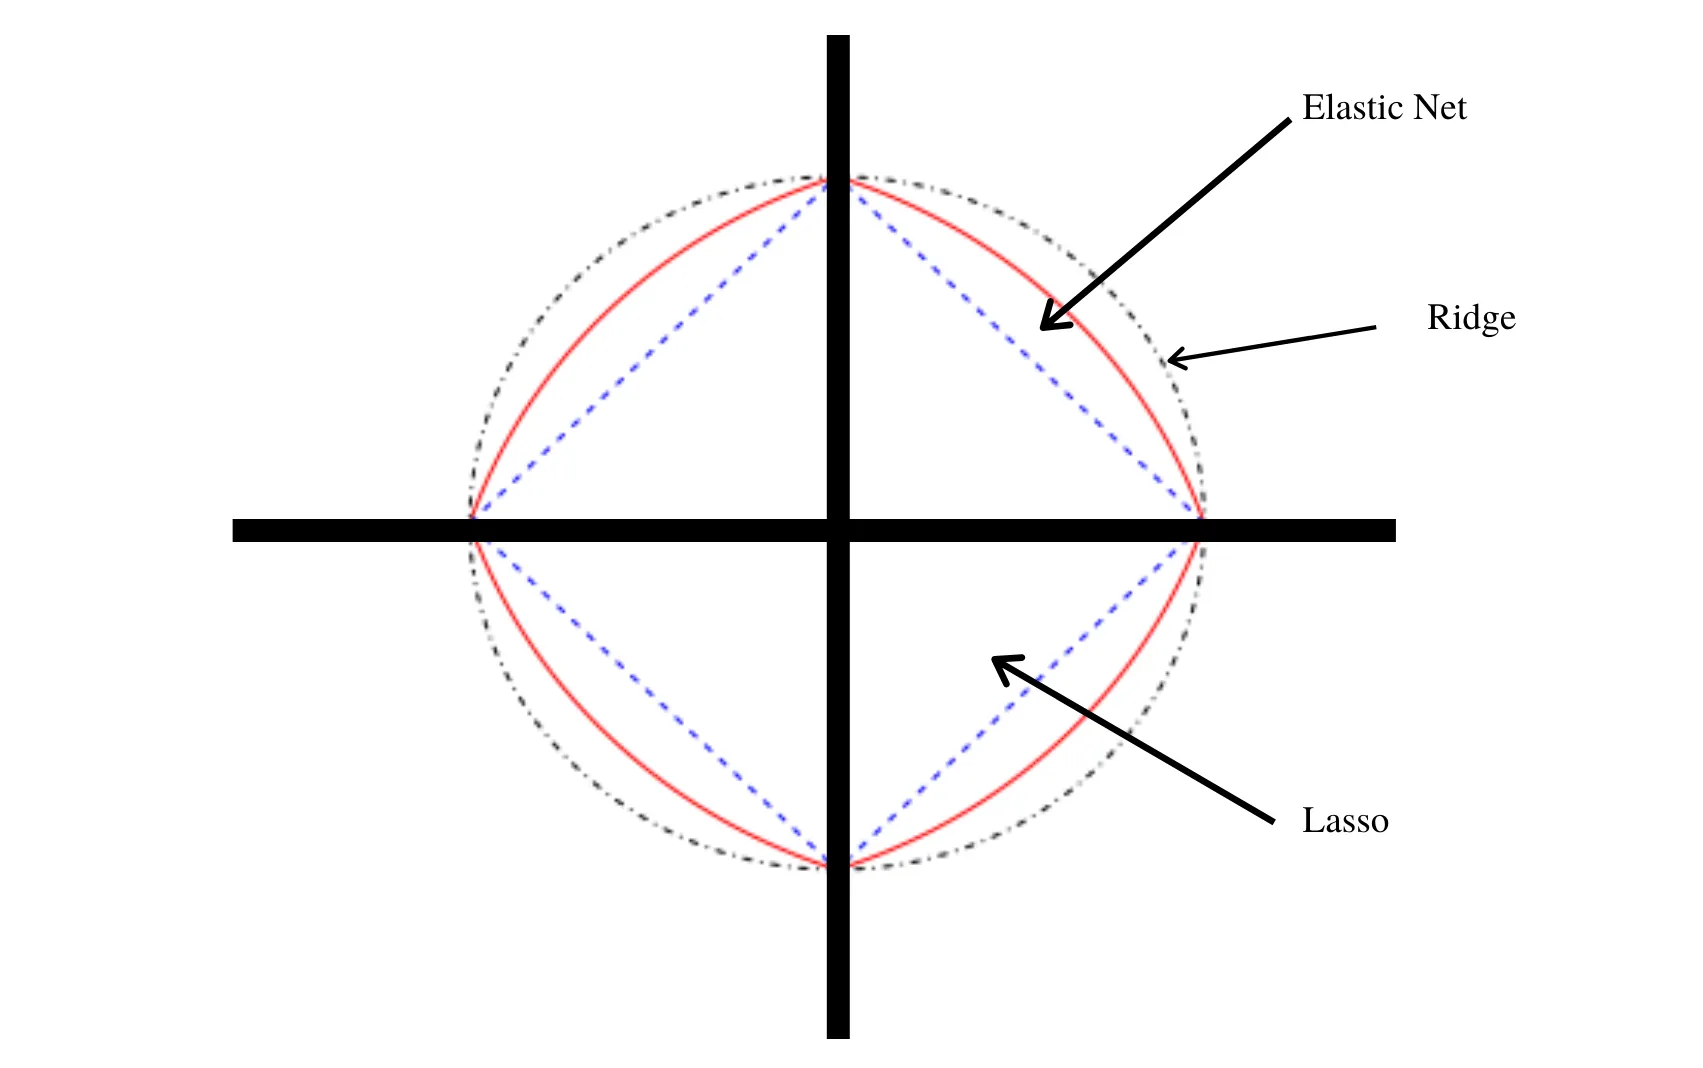

ElasticNet is a linear regression model trained with L1 and L2 prior as regularizer. This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. We control the convex combination of L1 and L2 using the l1_ratio parameter.

Elastic-net is useful when there are multiple features which are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.

A practical advantage of trading-off between Lasso and Ridge is it allows Elastic-Net to inherit some of Ridge’s stability under rotation.

The objective function to minimize is in this case:
minw12nsamples∥Xw−y∥22+αλ∥Xw−y∥1+α(1−λ)2∥w∥22
 
http://scikit-learn.org/stable/modules/linear_model.html#elastic-net

In [62]:
from pyspark.ml.regression import LinearRegression
from pyspark.mllib.evaluation import RegressionMetrics
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator, CrossValidatorModel
from pyspark.ml.evaluation import RegressionEvaluator

In [63]:
lr = (LinearRegression(featuresCol='features_scaled', labelCol="Avg_Mdcr_Stdzd_Amt", predictionCol='predAvg_Mdcr_Stdzd_Amt', 
                               maxIter=10, regParam=0.3, elasticNetParam=0.8, standardization=False))

In [64]:
# Fit the data to the model
linearModel = lr.fit(train_data)

# Evaluating the Model

# Inspect the Model Co-efficients

In [65]:
# Coefficients for the model
linearModel.coefficients

DenseVector([0.0, 0.0, 0.0, 0.0, -9.4281, 299.8157, 311.2098])

In [66]:
featureCols

['Tot_Rndrng_Prvdrs',
 'Tot_Benes',
 'Tot_Srvcs',
 'Tot_Bene_Day_Srvcs',
 'Avg_Sbmtd_Chrg',
 'Avg_Mdcr_Alowd_Amt',
 'Avg_Mdcr_Pymt_Amt']

In [67]:
# Intercept for the model
linearModel.intercept

1.443547641411512

In [68]:
coeff_df = pd.DataFrame({"Feature": ["Intercept"] + featureCols, "Co-efficients": np.insert(linearModel.coefficients.toArray(), 0, linearModel.intercept)})
coeff_df = coeff_df[["Feature", "Co-efficients"]]

In [69]:
coeff_df

,Feature,Co-efficients
0,Intercept,1.443548
1,Tot_Rndrng_Prvdrs,0.000000
2,Tot_Benes,0.000000
3,Tot_Srvcs,0.000000
4,Tot_Bene_Day_Srvcs,0.000000
5,Avg_Sbmtd_Chrg,-9.428129
6,Avg_Mdcr_Alowd_Amt,299.815690
7,Avg_Mdcr_Pymt_Amt,311.209777


# Generating Predictions

In [70]:
# Generate predictions
predictions = linearModel.transform(test_data)

In [71]:
# Extract the predictions and the "known" correct labels
predandlabels = predictions.select("predAvg_Mdcr_Stdzd_Amt", "Avg_Mdcr_Stdzd_Amt")

In [72]:
predandlabels.show()

+----------------------+------------------+
|predAvg_Mdcr_Stdzd_Amt|Avg_Mdcr_Stdzd_Amt|
+----------------------+------------------+
|    16.332812487849584|             16.66|
|    12.672019565675026|             12.88|
|     92.70092783352428|           74.8784|
|    21.834011734671627|             22.51|
|     9.630122088370193|              9.37|
|    33.085710387045175|             35.17|
|     84.97523007682155|            67.595|
|      138.775390426536|            134.69|
|     65.18750857547603|             69.78|
|    13.642046565186032|            13.565|
|    12.407792194048582|             12.26|
|     360.9068099827885|      315.68384615|
|    111.87054704946438|      114.41230769|
|    163.06906678732287|            151.51|
|    15.694212898271754|             15.75|
|     46.14424170845228|      44.489291971|
|     482.7295831936486|            532.09|
|     29.02612478891356|             27.86|
|     33.02712180845215|             34.19|
|     77.07293829448447|        

Therefore, we have successfully predicted the Avg_Mdcr_Stdzd_Amt and the differences in between the predictions from the original values of Avg_Mdcr_Stdzd_Amt test are very minute and closer.

# Inspect the Metrics

Looking at predicted values is one thing, but another and better thing is looking at some metrics to get a better idea of how good our model actually is.

Using the LinearRegressionModel.summary attribute:

Next, we can also use the summary attribute to pull up the rootMeanSquaredError and the r2.

# Using the LinearRegressionModel.summary attribute:

In [73]:
# Get the RMSE
print("RMSE: {0}".format(linearModel.summary.rootMeanSquaredError))

RMSE: 47.63755142301187


In [74]:
# Get the MAE
print("MAE: {0}".format(linearModel.summary.meanAbsoluteError))

MAE: 13.995059562712576


In [75]:
# Get the R2
print("R2: {0}".format(linearModel.summary.r2))

R2: 0.9937655946861421


# Using the RegressionEvaluator from pyspark.ml package:

In [76]:
evaluator = RegressionEvaluator(predictionCol="predAvg_Mdcr_Stdzd_Amt", labelCol='Avg_Mdcr_Stdzd_Amt', metricName='rmse')
print("RMSE: {0}".format(evaluator.evaluate(predandlabels)))

RMSE: 49.622269938945784


In [77]:
evaluator = RegressionEvaluator(predictionCol="predAvg_Mdcr_Stdzd_Amt", labelCol='Avg_Mdcr_Stdzd_Amt', metricName='mae')
print("MAE: {0}".format(evaluator.evaluate(predandlabels)))

MAE: 14.132826033947305


In [78]:
evaluator = RegressionEvaluator(predictionCol="predAvg_Mdcr_Stdzd_Amt", labelCol='Avg_Mdcr_Stdzd_Amt', metricName='r2')
print("R2: {0}".format(evaluator.evaluate(predandlabels)))

R2: 0.9936878826735754


The RMSE measures how much error there is between two datasets comparing a predicted value and an observed or known value. The smaller an RMSE value, the closer predicted and observed values are.

The R2 ("R squared") or the coefficient of determination is a measure that shows how close the data are to the fitted regression line. This score will always be between 0 and a 100% (or 0 to 1 in this case), where 0% indicates that the model explains none of the variability of the response data around its mean, and 100% indicates the opposite: it explains all the variability. That means that, in general, the higher the R-squared, the better the model fits our data.

# Normal Linear Regression

In [79]:
reg = LinearRegression(featuresCol = 'features_scaled', labelCol = 'Avg_Mdcr_Stdzd_Amt')

In [80]:
regmodel = reg.fit(train_data)

In [81]:
regsummary = regmodel.evaluate(train_data)

In [82]:
# r squared
regsummary.r2adj

0.9938442525673535

In [83]:
# root mean squared error
regsummary.rootMeanSquaredError

47.33532530725162

# Decision Tree Regressor

In [84]:
# Decision Tree Regressor
from pyspark.ml.regression import DecisionTreeRegressor

In [85]:
decisiontree= DecisionTreeRegressor(featuresCol = 'features_scaled', labelCol = 'Avg_Mdcr_Stdzd_Amt')

In [86]:
decisiontreemodel = decisiontree.fit(train_data)

In [87]:
decisiontreepredict = decisiontreemodel.transform(test_data)

In [88]:
# RMSE
evaluator = RegressionEvaluator(labelCol="Avg_Mdcr_Stdzd_Amt", predictionCol="prediction", metricName="rmse")

In [89]:
evaluator.evaluate(decisiontreepredict)

406.31645243478994

In [90]:
# R^2
evaluator = RegressionEvaluator(labelCol="Avg_Mdcr_Stdzd_Amt", predictionCol="prediction", metricName="r2")

In [91]:
evaluator.evaluate(decisiontreepredict)

0.5767951609736401

# Random forest regression

In [92]:
from pyspark.ml.regression import RandomForestRegressor

In [93]:
rf = RandomForestRegressor(featuresCol = 'features_scaled', labelCol = 'Avg_Mdcr_Stdzd_Amt')

In [94]:
rfmodel = rf.fit(train_data)

In [95]:
rfpredict = rfmodel.transform(test_data)

In [96]:
# RMSE
evaluatorRF = RegressionEvaluator(labelCol="Avg_Mdcr_Stdzd_Amt", predictionCol="prediction", metricName="rmse")

In [97]:
evaluatorRF.evaluate(rfpredict)

449.1197370459997

In [98]:
# R^2
evaluatorRF = RegressionEvaluator(labelCol="Avg_Mdcr_Stdzd_Amt", predictionCol="prediction", metricName="r2")

In [99]:
evaluatorRF.evaluate(rfpredict)

0.4829338696030673

# Gradient-boosted tree regression

In [100]:
from pyspark.ml.regression import GBTRegressor

In [101]:
# Train a GBT model.
gbt = GBTRegressor(featuresCol = 'features_scaled', labelCol = 'Avg_Mdcr_Stdzd_Amt', maxIter=12)

In [102]:
gbtmodel = gbt.fit(train_data)

In [103]:
gbtpredict = gbtmodel.transform(test_data)

In [104]:
# RMSE for gbt
evaluatorgbt = RegressionEvaluator(labelCol="Avg_Mdcr_Stdzd_Amt", predictionCol="prediction", metricName="rmse")

In [105]:
evaluatorgbt.evaluate(gbtpredict)

439.5796421411706

In [106]:
# R^2 for gbt
evaluatorgbt = RegressionEvaluator(labelCol="Avg_Mdcr_Stdzd_Amt", predictionCol="prediction", metricName="r2")

In [107]:
evaluatorgbt.evaluate(gbtpredict)

0.5046673550548724

# conclusion : 

The elasticnet(linear) regression and normal linear regression performed very well in predicting the 'Avg_Mdcr_Stdzd_Amt'. with RMSE, MAE, R2 as

In [109]:
evaluator = RegressionEvaluator(predictionCol="predAvg_Mdcr_Stdzd_Amt", labelCol='Avg_Mdcr_Stdzd_Amt', metricName='rmse')
print("RMSE: {0}".format(evaluator.evaluate(predandlabels)))

RMSE: 49.622269938945784


In [110]:
evaluator = RegressionEvaluator(predictionCol="predAvg_Mdcr_Stdzd_Amt", labelCol='Avg_Mdcr_Stdzd_Amt', metricName='mae')
print("MAE: {0}".format(evaluator.evaluate(predandlabels)))

MAE: 14.132826033947305


In [111]:
evaluator = RegressionEvaluator(predictionCol="predAvg_Mdcr_Stdzd_Amt", labelCol='Avg_Mdcr_Stdzd_Amt', metricName='r2')
print("R2: {0}".format(evaluator.evaluate(predandlabels)))

R2: 0.9936878826735754


Further, I have also used tree regressor models to check their efficiency, but due to standardization and being non-parametric the tree regressor models haven't performed that well. Therefore, both elastic and normal linear regression algortihms have been successfull in predicting the target variable.

# Note 1 : 

We know that  'Avg_Mdcr_Alowd_Amt','Avg_Mdcr_Pymt_Amt' are highly correlated with target variable and i have applied regression algorithms with and without them but there is not much improvement and also checked for adjusted R2. Hence, i have performed regression analysis with them. 

# Note 2 :

All the hyperparameter tuning is done by trail and error method. I haven't used any tuning methods like Randomizedsearch cv and Gridsearch cv as the number of variables are low and also the observations are high, which will result in consuming more time to implement them as it was easier to go with trail and error method for parameters.